In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys, os

sys.path.insert(0, ".")
os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from pixel_art.analysis.main_experiment import (
    load_sparsity_bars,
    data_spec,
    plot_density,
)

In [4]:
models = {
    "ST [NB]": ("pae-2b2", 9),
    "MT [NB]": ("pae-2ba2", 9),
}

In [5]:
sparsity_bars = load_sparsity_bars()

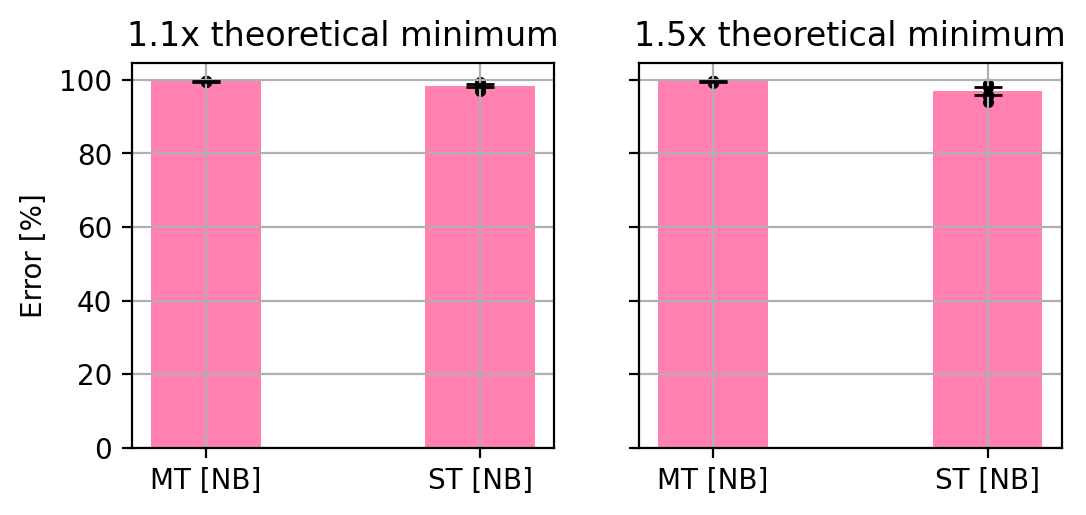

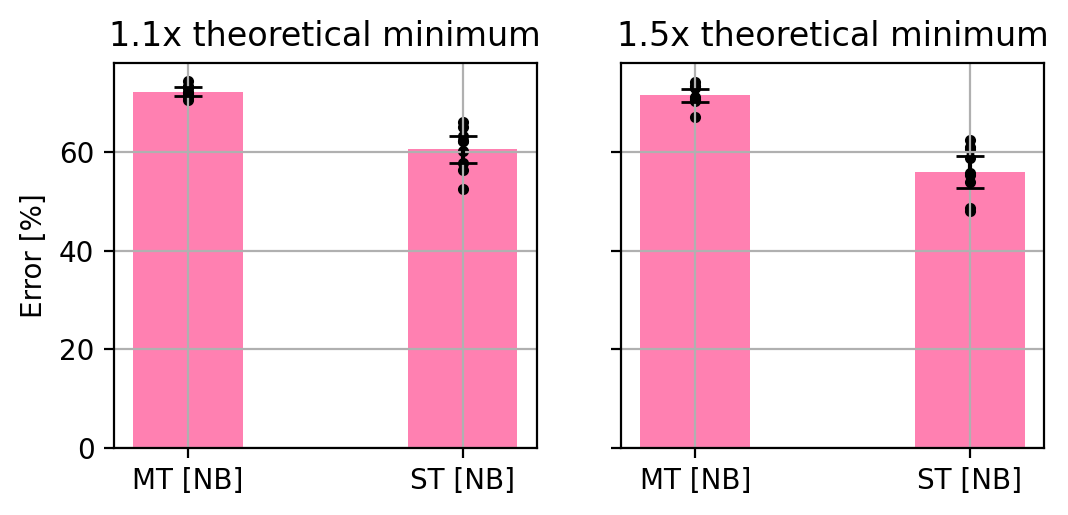

In [6]:
dense, almost_dense = {}, {}
for error_metric in "exact", "edit-dist":
    _, axs = plt.subplots(1, 2, facecolor="white", dpi=200, figsize=(6, 2.5), sharey=True)

    dense[error_metric] = plot_density(
        axs[0],
        models,
        sparsity_bars.right_above_line.sparsity_bar,
        ["MT [NB]", "ST [NB]"],
        accuracy_metric=error_metric,
    )
    almost_dense[error_metric] = plot_density(
        axs[1],
        models,
        sparsity_bars.right_above_line.sparsity_bar / 0.75,
        ["MT [NB]", "ST [NB]"],
        accuracy_metric=error_metric,
    )
    axs[0].set_ylabel("Error [%]")
    plt.show()

In [7]:
dense["edit-dist"].applymap(lambda x: f"{x:.2f}")

,1,2,3,4,5,6,7,8,9
ST [NB],62.30,56.37,65.11,63.18,62.25,60.19,57.82,52.48,66.04
MT [NB],73.13,73.52,71.94,71.19,74.48,nan,72.25,70.60,71.27


In [8]:
dense["edit-dist"].applymap(lambda x: f"{x:.2f}").T.min()

ST [NB]    52.48
MT [NB]    70.60
dtype: object